# Tarea del Curso cero del Bongo Physics

Importamos las librerías.

In [5]:
import sys
import os
# Agregar el directorio padre al path
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd())
sys.path.insert(0, parent_dir)

import scripts.decaimiento as de

In [6]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

Trabajamos con un simulación de una muestra de Rodio a 1 muCi.

In [7]:
# Muestra de Rodio a 1 muCi
# masa incial de la muestra en g
mass=1.22E-11
# masa molar g/mol (Rh 99)
molarmass=98.91
# numero de átomos en la muestra inicial = masa / masa molar * NA
N=mass/molarmass*6.022E23
# constante de tiempo en segundos = segundos por hora * horas por dia * vida media en dias / log2
Tau=3600*24*16.1/math.log(2)
# tiempo de observacion en segundos
T=1.0
# distancia del detector a la muestra en cm
D=10
# área efectiva de detección en cm2
A=100

Generamos los datos de la 

In [8]:
# numero de cuentas por segundo vs antiguedad de la muestra en dias
# ejemplo con 10 observaciones a los 0, 10, 20, etc dias. 10 s de observación en cada ocasión
muestras=de.toma_muestras([0,10,20,30,40,50,60,70,80,90],[10.0]*10)

## Proyecto
¿Puedes preparar una representación gráfica que muestre 5 vidas medias?  
Utiliza este conjunto de datos

In [9]:
muestras

,fecha_obs_dias,t_obs_s,cuentas
0,0,10.0,29561
1,10,10.0,19117
2,20,10.0,12449
3,30,10.0,8084
4,40,10.0,5246
5,50,10.0,3428
6,60,10.0,2248
7,70,10.0,1426
8,80,10.0,937
9,90,10.0,612


## Respuesta personal
Aquí lo que hago es que tomo los datos y los gráfico según lo que necesito.

In [17]:
# Guardamos los datos en un archivo externo.
muestras.to_csv("../data/muestras.csv")

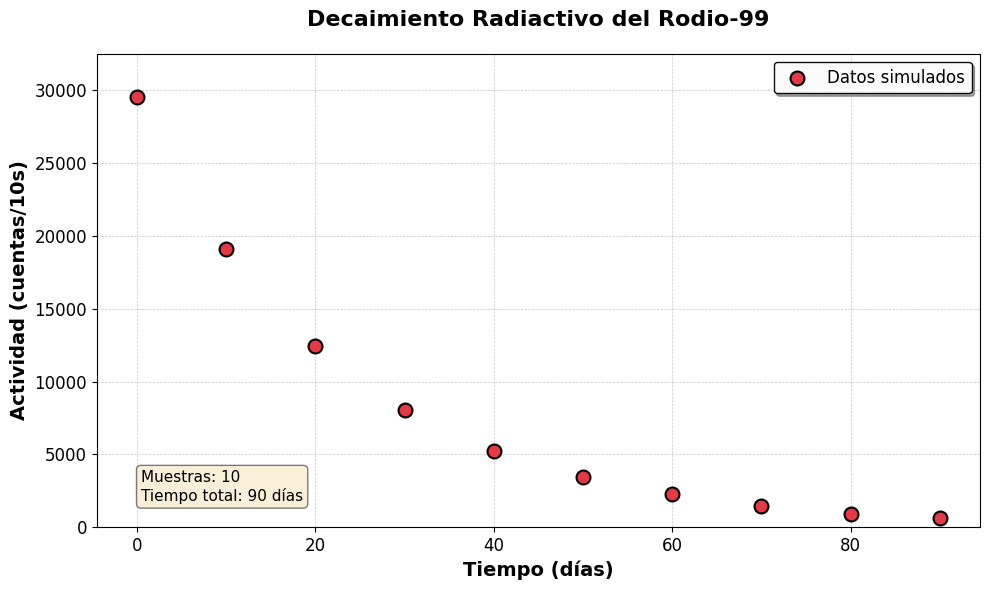

In [22]:
# Gráficamos los datos tal cual como se ven actualmente.
plt.figure(figsize=(10, 6), dpi=100)

# Gráfico de dispersión mejorado
plt.scatter(muestras['fecha_obs_dias'], muestras['cuentas'], 
           s=100,  # Tamaño de los puntos
           c='#E63946',  # Color rojo atractivo
           alpha=1,  # Transparencia
           edgecolors='black',  # Borde negro
           linewidth=1.5,  # Grosor del borde
           label='Datos simulados',
           zorder=3)  # Para que los puntos estén al frente

# Etiquetas y título
plt.xlabel('Tiempo (días)', fontsize=14, fontweight='bold')
plt.ylabel("Actividad (cuentas/10s)", fontsize=14, fontweight='bold')
plt.title('Decaimiento Radiactivo del Rodio-99', 
          fontsize=16, fontweight='bold', pad=20)

# Grid profesional
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.tick_params(axis='both', labelsize=12)

# Leyenda
plt.legend(loc='upper right', fontsize=12, framealpha=0.95, 
          edgecolor='black', fancybox=True, shadow=True)

# Ajustar límites del eje Y para mejor visualización
plt.ylim(0, muestras['cuentas'].max() * 1.1)

# Texto informativo
texto = f"Muestras: {len(muestras)}\nTiempo total: {muestras['fecha_obs_dias'].max()} días"

plt.text(0.05, 0.05, texto, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../figuras/datos_originales_Rh99.png', dpi=300, bbox_inches='tight')
plt.show()

Aunque con matplotlib podemos graficar el logaritmo, no podemos manipular esos datos. Por lo mismo, lo hacemos con Numpy y luego simplemente gráficamos los datos con el logaritmo.

In [25]:
# Calculamos el logaritmo de la columna cuentas y registramos en otra columna.
muestras['log(cuentas)'] = np.log(muestras['cuentas'])

# Buscamos la recta que mejor se ajuste a nuestros datos.
slope, intercept, r_value, p_value, std_err = linregress(muestras['fecha_obs_dias'], muestras['log(cuentas)'])
print(f"""Los datos resultantes son:\n- Pendiente de la recta = {slope}\n- intercepción con el eje Y = {intercept}\n- R^2 (Calidad del ajuste) = {r_value}\n- p_valor = {p_value}\n- Desviación estandar = {std_err}""")

Los datos resultantes son:
- Pendiente de la recta = -0.04309437671309286
- intercepción con el eje Y = 10.291684546819841
- R^2 (Calidad del ajuste) = -0.9999890036023805
- p_valor = 6.39696636310574e-20
- Desviación estandar = 7.145282556983307e-05


Dado que nuestra ecuación de la recta es 

log(A(t)) = log(A_0) + lambda * t

donde lambda es la pendiente de la recta. Por lo tanto, lambda es igual a (0.04304 +- 0.00005) días⁻¹, teniendo en cuenta que el error esta dado por la desviación estándar obtenida del ajuste lineal.

Ahora, el tiempo de vida media del elemento podemos calcularlo con la ecuación:

T_{1/2} = ln(2)/lambda

In [26]:
# Calculamos el tiempo de vida 
t_half_life = np.log(2)/np.abs(slope)
print(f"El tiempo de vida media obtenido es {t_half_life}")

El tiempo de vida media obtenido es 16.08439971587649


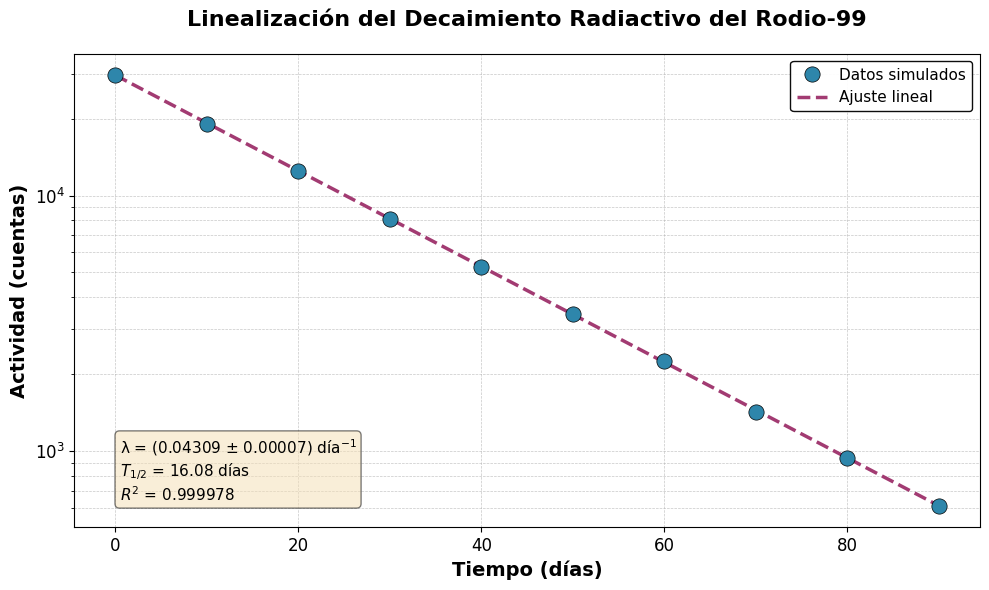

In [27]:
# Gráficamos los datos en escala logaritmica.
plt.figure(figsize=(10, 6), dpi=100)

# Datos experimentales
plt.semilogy(muestras['fecha_obs_dias'], muestras['cuentas'], 
             'o', color='#2E86AB', markersize=11, 
             markeredgecolor='black', markeredgewidth=0.5, 
             label='Datos simulados', zorder=3)

# Ajuste lineal
plt.semilogy(muestras['fecha_obs_dias'],
             (muestras['cuentas'].max()*np.exp(slope*muestras['fecha_obs_dias'])), 
             '--', color='#A23B72', linewidth=2.5, 
             label='Ajuste lineal', zorder=2)

# Etiquetas
plt.xlabel('Tiempo (días)', fontsize=14, fontweight='bold')
plt.ylabel("Actividad (cuentas)", fontsize=14, fontweight='bold')
plt.title('Linealización del Decaimiento Radiactivo del Rodio-99', fontsize=16, fontweight='bold', pad=20)

# Grid y ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.tick_params(axis='both', labelsize=12)

# Leyenda
plt.legend(loc='upper right', fontsize=11, framealpha=0.95, 
           edgecolor='black', fancybox=True)

# Información estadística
texto = f'λ = ({abs(slope):.5f} ± {std_err:.5f}) día$^{{-1}}$\n'
texto += f'$T_{{1/2}}$ = {t_half_life:.2f} días\n'
texto += f'$R^2$ = {r_value**2:.6f}'
plt.text(0.05, 0.05, texto, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../figuras/linealización_decaimiento_Rh99.png', dpi=300, bbox_inches='tight')
plt.show()

**Resultado:**


Considerando la información entregada al inicio de nuestro documento, tenemos que se trata de un isótopo radioactivo del elemento Rodio (Rh). Y según el valor de su vida media, podemos identificar que se trata de Rh-99, el cual tiene una vida media de 16.1 días.